# Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
try: df = pd.read_csv(r'C:\Users\v.ipatko\Desktop\Pract\dataset\games.csv')
except: df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.columns = df.columns.str.lower()

Привели названия всех колонок к нижнему регистру.

In [7]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int')

Заполнили все пропуски в колонке "Дата выхода" для того что бы привести колонку к целочисленному типу.

In [10]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - воспринимаем как пропуск. Это значит что пользовательский рейтинг ещё не определён.


In [12]:
df['user_score'] = df['user_score'].fillna(10)

Нули в оценках пользователей присутствуют, а вот 10 нет, замениим пропуски на оценки в 10 баллов.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 10

In [14]:
df['user_score'] = df['user_score'].astype('float')

In [15]:
df['rating'] = df['rating'].fillna('undefined')

Заменил пропуски в столбце рейтинг на значения "не определено"

Пропуски в датасете пристутсвуют в столбце с датой релиза игры, возможно из-за того что точно год выхода установить уже не явлется возможнмы или из-за того что он дублируется в названии в случае с симуляторами, а так же в трех последних столбцах с рейтингами коммиссий, оценкой польтзователей и критиков. Вероятно эти данные были присоединены из другого источника, частично они отсутствуют потому что ещё не оценены игры, а частично возможно из-за ошибок при переносе

Привели значения в столбце "Оценка пользователей" к численному типу для дальнейшей работы с ним.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# ШАГ 3 Исследовательский анализ данных

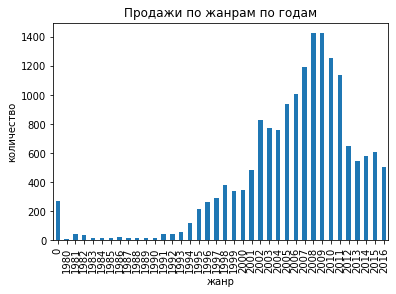

In [102]:
df.groupby('year_of_release')['genre'].count().plot(kind='bar')
plt.title('Продажи по жанрам по годам')
plt.xlabel('жанр')
plt.ylabel('количество');

До 95 года игр выходило очень мало и данные за этот период не важны, так же есть аномалия на 0 из-за того что мы заполняли им пропуски, этими данными тоже можно пренебречь.

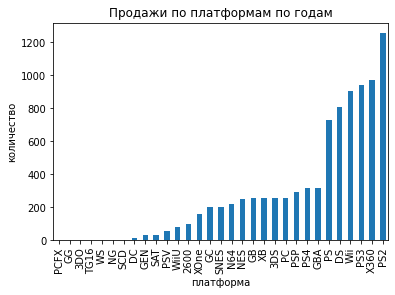

In [101]:
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title('Продажи по платформам по годам')
plt.xlabel('платформа')
plt.ylabel('количество');

In [20]:
ps = df.loc[df['platform'] == 'PS']

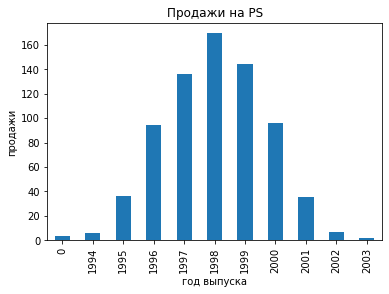

In [100]:
ps.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на PS')
plt.xlabel('год выпуска')
plt.ylabel('количество');

In [22]:
ds = df.loc[df['platform'] == 'DS']

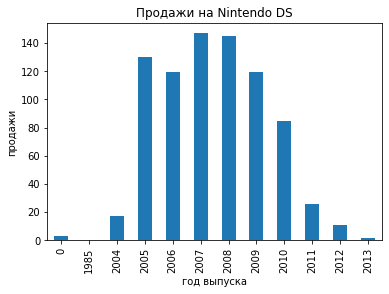

In [99]:
ds.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на Nintendo DS')
plt.xlabel('год выпуска')
plt.ylabel('количество');

In [24]:
wii = df.loc[df['platform'] == 'Wii']

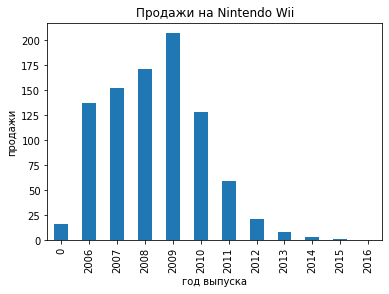

In [98]:
wii.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на Nintendo Wii')
plt.xlabel('год выпуска')
plt.ylabel('количество');

In [26]:
ps_3 = df.loc[df['platform'] == 'PS3']

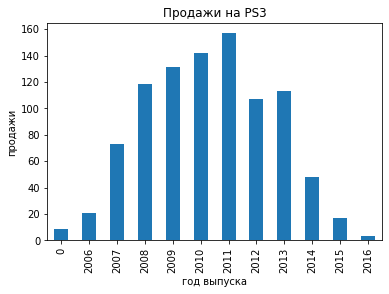

In [97]:
ps_3.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на PS3')
plt.xlabel('год выпуска')
plt.ylabel('количество');

In [28]:
x_360 = df.loc[df['platform'] == 'X360']

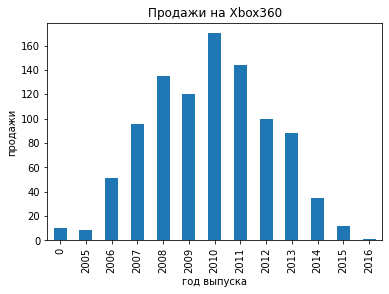

In [96]:
x_360.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на Xbox360')
plt.xlabel('год выпуска')
plt.ylabel('количество');

In [30]:
ps_2 = df.loc[df['platform'] == 'PS2']

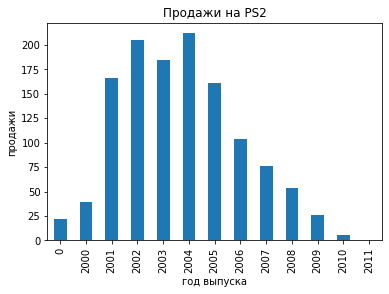

In [103]:
ps_2.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на PS2')
plt.xlabel('год выпуска')
plt.ylabel('количество');

Новые платформы появляются примерно раз в 5 лет, а устаревают за 10

In [32]:
dfa = df.loc[df['year_of_release'] >= 2012]

In [33]:
ds_3 = dfa.loc[df['platform'] == '3DS']

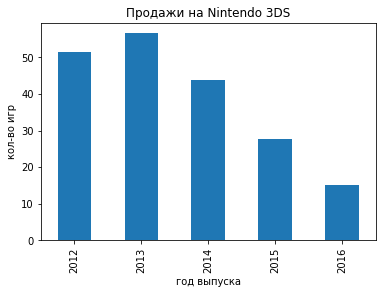

In [107]:
ds_3.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Продажи на Nintendo 3DS')
plt.xlabel('год выпуска')
plt.ylabel('кол-во игр');

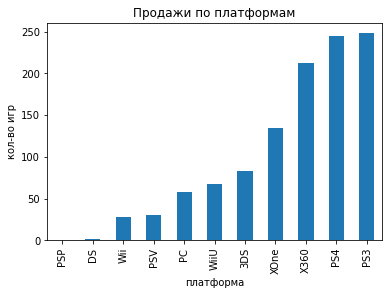

In [108]:
dfa.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title('Продажи по платформам')
plt.xlabel('платформа')
plt.ylabel('кол-во игр');

За период с 2012 лидирует по продажам PS4 и при этом доля продаж этой приставки растёт, 3DS, PS3 и X360 теряют продажи, XOne растёт

In [36]:
top_p = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC']

In [37]:
dfa_top = dfa.loc[df['platform'].isin(top_p)]

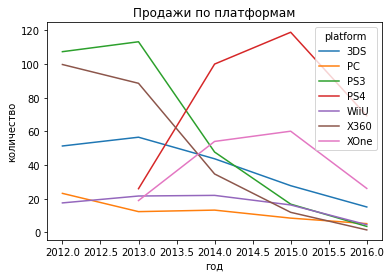

In [110]:
dfa_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot()
plt.title('Продажи по платформам')
plt.xlabel('платформа')
plt.ylabel('количество');

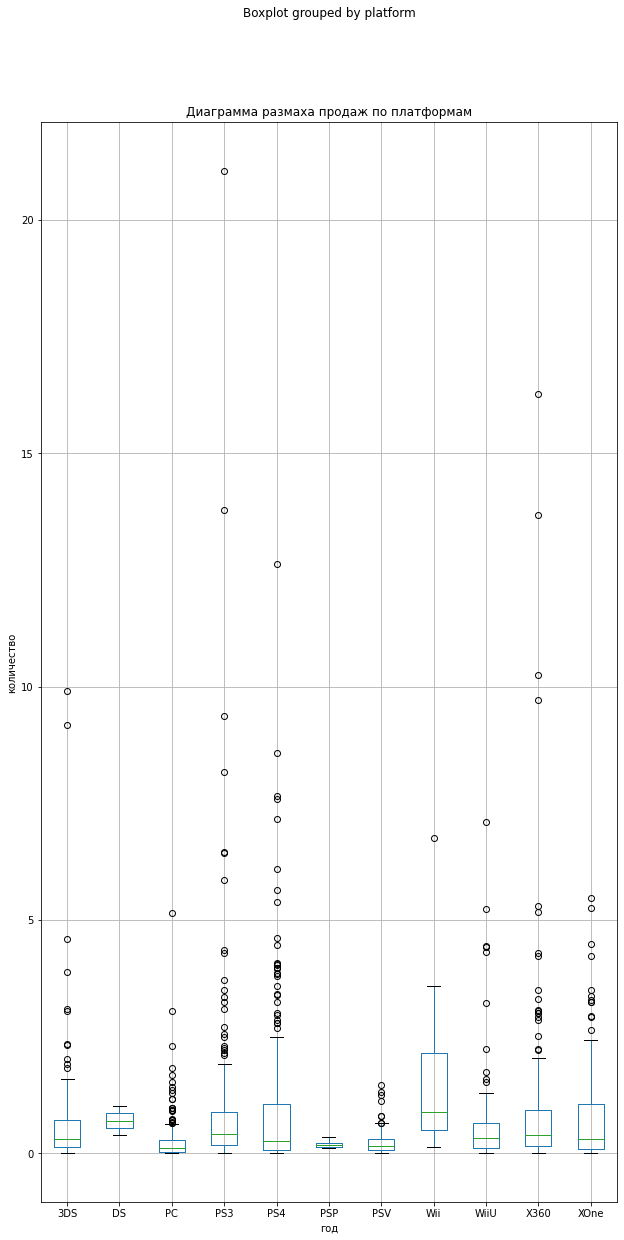

In [114]:
dfa.boxplot(column=['total_sales'], by='platform', figsize=(10,20))
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('год')
plt.ylabel('количество');

Рекордсмен по продажам (хитовым играм продающимся самым большим тиражом) PS3, за ним с отрывом в 5 миллионов идет X360, а третье место на двоих заняли PS4 и 3DS. Меньше всего денег собрали PSP, DS и PSV.

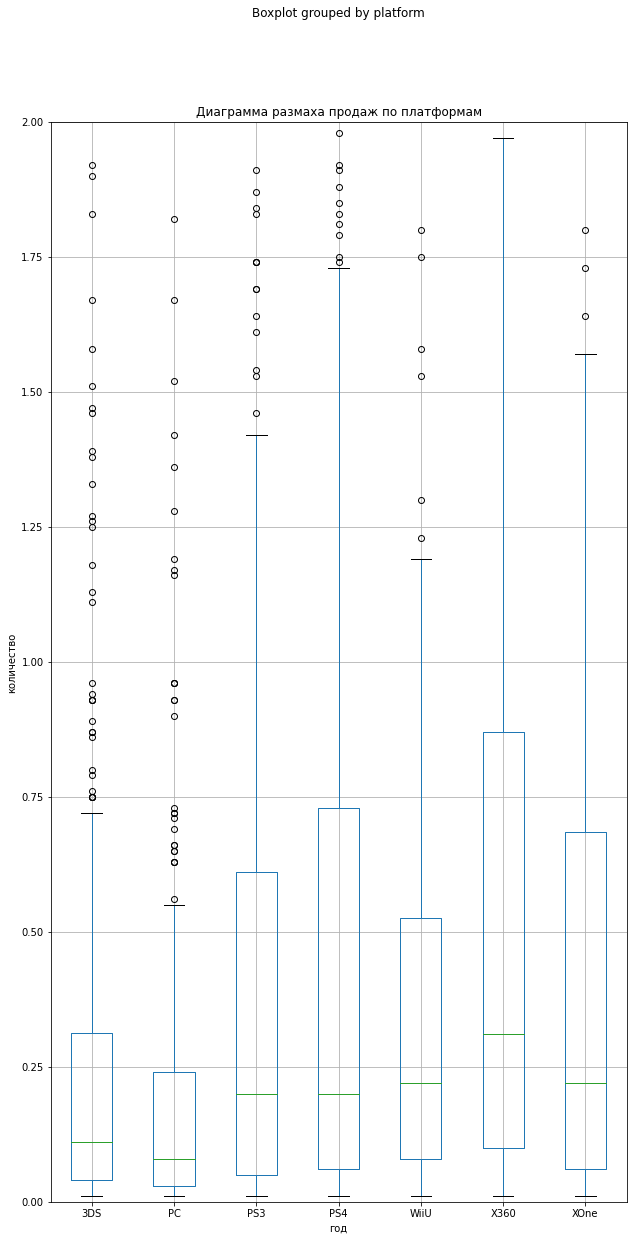

In [115]:
dfa_top.boxplot(column=['total_sales'], by='platform', figsize=(10,20))
plt.ylim(0, 2)
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('год')
plt.ylabel('количество');

Медиана по продажам игр у X360 выше, чем у остальных платформ, Значит в среднем каждая игра на этой приставке продаётся большим тиражом чем на других платформах.

In [41]:
dfa = dfa[dfa['user_score'] < 10]

In [42]:
xbox360 = dfa.loc[df['platform'] == 'X360']

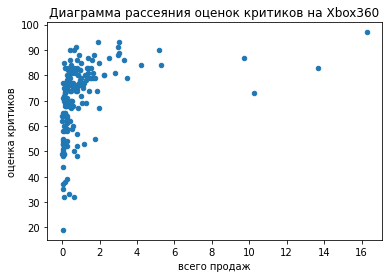

In [117]:
xbox360.plot(x='total_sales', y='critic_score', kind='scatter')
plt.title('Диаграмма рассеяния оценок критиков на Xbox360')
plt.xlabel('всего продаж')
plt.ylabel('оценка критиков');

Игра имеющая самый высокие оценки критиков показывает наибольшие продажи, но при этом много игр с хорошей оценкой плохо продаётся.

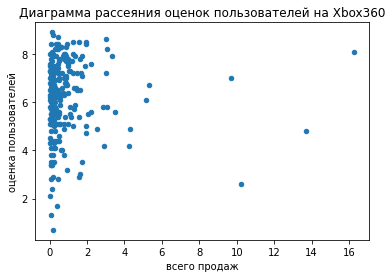

In [118]:
xbox360.plot(x='total_sales', y='user_score', kind='scatter')
plt.title('Диаграмма рассеяния оценок пользователей на Xbox360')
plt.xlabel('всего продаж')
plt.ylabel('оценка пользователей');

По оценкам пользователей самая продаваемая игра не заслужила наивысших оценок. Есть игры хуже продащиея, но с более высокой оценкой.

In [45]:
xbox360['critic_score'].corr(xbox360['total_sales'])

0.3605734888507336

In [46]:
xbox360['user_score'].corr(xbox360['total_sales'])

0.006163978646213326

Продажи на X360 имеют слабую корреляцию с оценками критиков и не зависят от оценок пользователей.

In [47]:
dfa.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.144179,-0.081823,-0.104177,-0.091386,0.017716,-0.019996,-0.128350
na_sales,-0.144179,1.000000,0.719814,0.249276,0.762570,0.288522,-0.014217,0.909843
eu_sales,-0.081823,0.719814,1.000000,0.284713,0.930867,0.281959,-0.022042,0.927912
jp_sales,-0.104177,0.249276,0.284713,1.000000,0.244057,0.115022,0.163980,0.404741
other_sales,-0.091386,0.762570,0.930867,0.244057,1.000000,0.271063,-0.010909,0.922396
critic_score,0.017716,0.288522,0.281959,0.115022,0.271063,1.000000,0.517727,0.306516
user_score,-0.019996,-0.014217,-0.022042,0.163980,-0.010909,0.517727,1.000000,0.004429
total_sales,-0.128350,0.909843,0.927912,0.404741,0.922396,0.306516,0.004429,1.000000


В среднем корреляция между оценкой критиков и продажами чуть меньше чем корреляция на X360, зато оценки пользователей в среднем по платформам влияют на продажи больше, чем на X360.

In [48]:
ds_3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.082787,-0.086559,-0.033883,-0.078176,-0.048492,0.095125,-0.071661
na_sales,-0.082787,1.000000,0.931508,0.666101,0.991136,0.328829,-0.089111,0.939587
eu_sales,-0.086559,0.931508,1.000000,0.684292,0.963864,0.259721,-0.079927,0.940331
jp_sales,-0.033883,0.666101,0.684292,1.000000,0.680866,0.307799,0.052281,0.868770
other_sales,-0.078176,0.991136,0.963864,0.680866,1.000000,0.309119,-0.083814,0.951971
critic_score,-0.048492,0.328829,0.259721,0.307799,0.309119,1.000000,0.543210,0.320803
user_score,0.095125,-0.089111,-0.079927,0.052281,-0.083814,0.543210,1.000000,-0.037690
total_sales,-0.071661,0.939587,0.940331,0.868770,0.951971,0.320803,-0.037690,1.000000


На 3ds Оценки пользователей совсем не влияют на продажи, а оценки критиков влияют очень слабо

In [49]:
pc = df.loc[df['platform'] == 'PC']

In [50]:
pc.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.005828,0.006330,0.004551,-0.012370,-0.003325,0.026580,0.005587
na_sales,0.005828,1.000000,0.406504,0.399241,0.393763,0.192117,0.038576,0.806029
eu_sales,0.006330,0.406504,1.000000,-0.015430,0.559366,0.222479,-0.017763,0.863323
jp_sales,0.004551,0.399241,-0.015430,1.000000,-0.015282,0.095064,0.035578,0.203516
other_sales,-0.012370,0.393763,0.559366,-0.015282,1.000000,0.209204,-0.064331,0.639056
critic_score,-0.003325,0.192117,0.222479,0.095064,0.209204,1.000000,0.527021,0.256887
user_score,0.026580,0.038576,-0.017763,0.035578,-0.064331,0.527021,1.000000,0.003301
total_sales,0.005587,0.806029,0.863323,0.203516,0.639056,0.256887,0.003301,1.000000


На pc Оценки пользователей совсем не влияют на продажи, а оценки критиков влияют ещё слабее чем на 3ds

In [51]:
ps_4 = df.loc[df['platform'] == 'PS4']

In [52]:
ps_4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.168788,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.107729,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.132775,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.144788,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.123621,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.534148,0.406568
user_score,0.168788,-0.107729,-0.132775,0.144788,-0.123621,0.534148,1.000000,-0.119320
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.119320,1.000000


На PS4 Оценки пользователей имееют очень слабую отрицательную корреляцию с продажами, то есть при хорошей оценке продажи даже чуть хуже, а оценки критиков влияют сильнее чем на других платформах

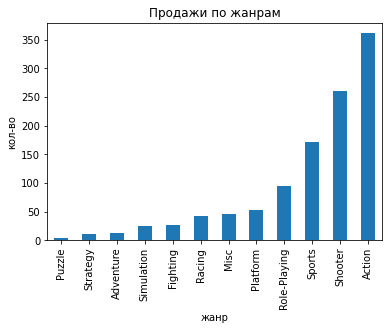

In [120]:
dfa.groupby('genre')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title('Продажи по жанрам')
plt.xlabel('жанр')
plt.ylabel('кол-во');

Лучше всего продаются Экшены, Шутеры, РПГ и спортивные игры, а хуже всего паззлы, стратегии, приключения и симуляторы.

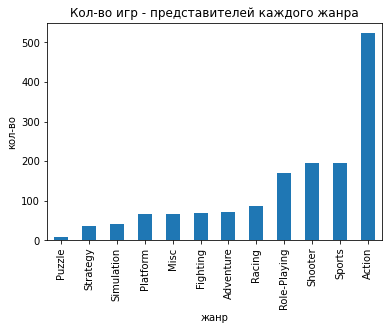

In [123]:
dfa.groupby('genre')['year_of_release'].count().sort_values().plot(kind='bar')
plt.title('Кол-во игр - представителей каждого жанра')
plt.xlabel('жанр')
plt.ylabel('кол-во');

Количество экшнов сильно превышает количество игр в остальных жанрах, будем смотреть медианные продажи


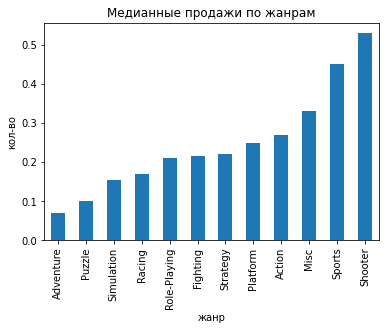

In [124]:
dfa.groupby('genre')['total_sales'].median().sort_values().plot(kind='bar')
plt.title('Медианные продажи по жанрам')
plt.xlabel('жанр')
plt.ylabel('кол-во');

Всё таки лучше всего продаются Шутеры, спортивные игры и платформеры, за ними идут рпг, гонки и файтинги. Экшны по мединным продажам далеко в конце.

# ШАГ 4 Портрет пользователя каждого региона

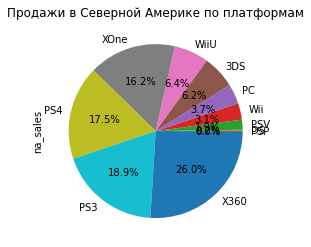

In [126]:
dfa.groupby('platform')['na_sales'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%')
plt.title('Продажи в Северной Америке по платформам');

В Северной Америке лидером по продажам является X360, за ним следуют PS4 и PS3, четвертое место за XOne и замыкает пятёрку 3DS.

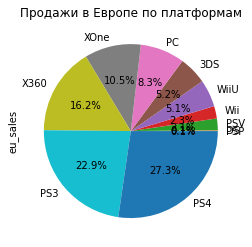

In [127]:
dfa.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%')
plt.title('Продажи в Европе по платформам');

В Европе лидерами по продажам являетсю PS4 и PS3, за ними следует X360 и XOne и замыкает пятёрку 3DS.

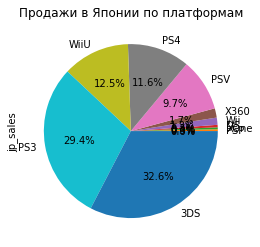

In [128]:
dfa.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%')
plt.title('Продажи в Японии по платформам');

В Японии безоговорочным лидером является 3DS, за ним следуют PS3 и PSV и замыкает пятёрку PS4.

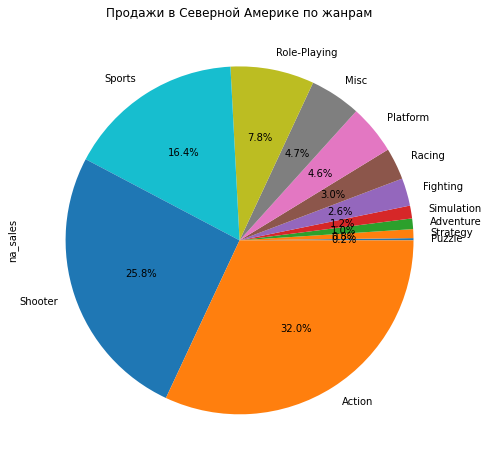

In [130]:
dfa.groupby('genre')['na_sales'].sum().sort_values().plot(kind='pie', figsize=(8,8),autopct='%1.1f%%')
plt.title('Продажи в Северной Америке по жанрам');

В Северной Америке пользователи больше всего предпочитают играть в Экшны, Шутеры и спортивные игры. А замыкают топ 5 РПГ и смешанные жанры.

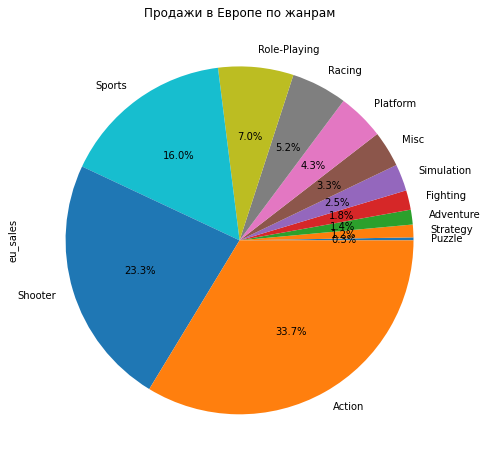

In [131]:
dfa.groupby('genre')['eu_sales'].sum().sort_values().plot(kind='pie', figsize=(8,8),autopct='%1.1f%%')
plt.title('Продажи в Европе по жанрам');

В Европе картина похожая, с небольшим лишь различие на 5 месте, вместо смешанных жанров европейцы предпочитают гонки.

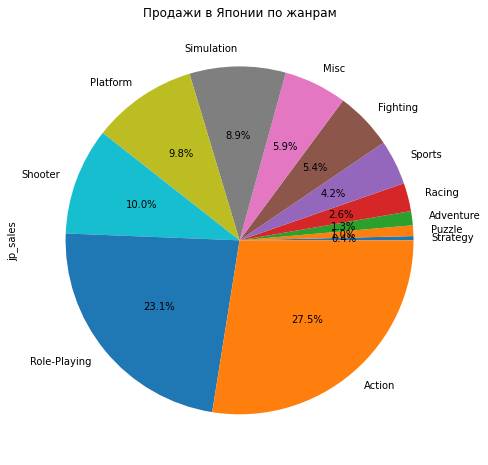

In [132]:
dfa.groupby('genre')['jp_sales'].sum().sort_values().plot(kind='pie', figsize=(8,8),autopct='%1.1f%%')
plt.title('Продажи в Японии по жанрам');

У японцев на первом месте ролевые игры, на втором экшны, третье место занимают игры смешанных жанров, а замыкают пятёрку симуляторы и файтинги. Такое различие наверняка связано с популярностью разных игровых платформам и удобствами игры на них в определенные жанры.

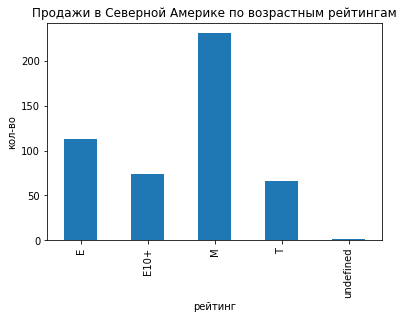

In [134]:
dfa.groupby('rating')['na_sales'].sum().plot(kind='bar')
plt.title('Продажи в Северной Америке по возрастным рейтингам')
plt.xlabel('рейтинг')
plt.ylabel('кол-во');

В Северной Америке наибольшая доля продаж приходится на игры для взрослых, следом идут игры без ограничения по возрасту и игры с неопределённой категорией, а за ними 10+ и тинейджеры.

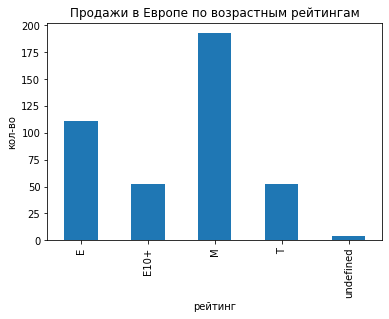

In [135]:
dfa.groupby('rating')['eu_sales'].sum().plot(kind='bar')
plt.title('Продажи в Европе по возрастным рейтингам')
plt.xlabel('рейтинг')
plt.ylabel('кол-во');

В Европе наибольшая доля продаж приходится на игры для взрослых, следом идут игры без ограничения по возрасту и игры без категории, а за ними 10+ и тинейджеры.

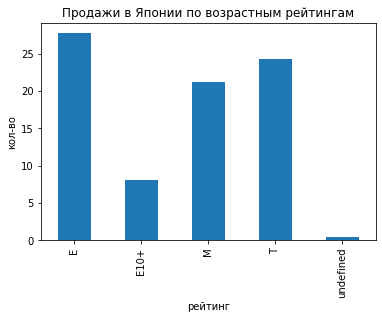

In [136]:
dfa.groupby('rating')['jp_sales'].sum().plot(kind='bar')
plt.title('Продажи в Японии по возрастным рейтингам')
plt.xlabel('рейтинг')
plt.ylabel('кол-во');

В Японии наибольшая доля продаж приходится на игры не оценённые возрастным рейтингом, остальыне все продаются практически одинаково, меньше всего игры для детей 10+

# Шаг 5 Проверка Гипотез

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза  - рейтинги отличаются

In [65]:
array_1 = dfa.loc[dfa['platform'] == 'XOne']

In [66]:
array_2 = dfa.loc[dfa['platform'] == 'PC']

In [67]:
alpha = 0.01

In [68]:
results = st.ttest_ind(array_1['user_score'], array_2['user_score'])
print('p-значение: ', results.pvalue)
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу, рейтинги отличаются')
else:
    print('Гипотезу отвергнуть не получилось - рейтинги одинаковые')

p-значение:  0.5535080500643661
Гипотезу отвергнуть не получилось - рейтинги одинаковые


In [69]:
array_1['user_score'].mean()

6.521428571428572

In [70]:
array_2['user_score'].mean()

6.4286407766990274

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны. Соответсвенно проверяем альтернативную гипотезу, о том что рейтинги отличаются.

In [71]:
array_3 = dfa.loc[dfa['genre'] == 'Action']

In [72]:
array_4 = dfa.loc[dfa['genre'] == 'Sports']

In [73]:
results = st.ttest_ind(array_3['user_score'], array_4['user_score'])
print('p-значение: ', results.pvalue)
if alpha > results.pvalue:
    print('Нулевую гипотезу отвеграем')
else:
    print('Гипотезу отвергнуть не получилось')

p-значение:  3.7163089460934874e-26
Нулевую гипотезу отвеграем


Сответственно альтернативную гипотезу о том, что рейтинги отличаются мы подтверждаем.

In [74]:
array_3['user_score'].mean()

6.825047801147227

In [75]:
array_4['user_score'].mean()

5.455897435897437

# ШАГ 6 Общий вывод

   
   До 95 года игр выходило очень мало и данные за этот период не важны, так же есть аномалия на 0 из-за того что мы заполняли им пропуски, этими данными тоже можно пренебречь. Новые платформы появляются примерно раз в 5 лет, а устаревают за 10. За период с 2012 лидирует по продажам PS4 и при этом доля продаж этой приставки растёт, 3DS, PS3 и X360 теряют долю продаж, доля XOne  также растёт.

   Рекордсмен по продажам (хитовым играм продающимся самым большим тиражом) PS3, за ним с отрывом в 5 миллионов идет X360, а третье место на двоих заняли PS4 и 3DS. Меньше всего денег собрали PSP, DS и PSV. Игры имеющая самый высокие оценки критиков показывает наибольшие продажи, но при этом много игр с хорошей оценкой плохо продаётся. По оценкам пользователей самая продаваемая игра не заслужила наивысших оценок. Есть игры хуже продащиеся, но с более высокой оценкой.      
   
   Продажи на X360 имеют слабую корреляцию с оценками критиков и почти не зависят от оценок пользователей. В среднем корреляция между оценкой критиков и продажами чуть меньше, чем корреляция на X360, зато оценки пользователей в среднем по платформам влияют на продажи больше, чем на X360. Лучше всего продаются Экшены, Шутеры, РПГ и спортивные игры, а хуже всего паззлы, стратегии, приключения и симуляторы.                  
   
   
В Северной Америке лидером по продажам является X360, за ним следуют PS4 и PS3, четвертое место за XOne и замыкает пятёрку 3DS. В Европе лидерами по продажам являетсю PS4 и PS3, за ними следует X360 и XOne и замыкает пятёрку 3DS. В Японии поддерживают отечественного производителя - безоговорочным лидером является 3DS, за ним следуют PS3 и PSV и замыкает пятёрку PS4.    


В Северной Америке пользователи больше всего предпочитают играть в Экшны, Шутеры и спортивные игры. А замыкают топ 5 РПГ и смешанные жанры. В Европе картина похожая, с небольшим лишь различием в конце списка, вместо смешанных жанров европейцы предпочитают гонки. У японцев на первом месте ролевые игры, на втором экшны, третье место занимают игры смешанных жанров, а замыкают пятёрку симуляторы и файтинги. Такое различие наверняка связано с популярностью разных игровых платформам и удобствами игры на них в определенные жанры.                                  


В Северной Америке наибольшая доля продаж приходится на игры ценённые ESRB как игры для взрослых, следом идут игры без ограничения по возрасту, а за ними 10+ и тинейджеры. В Европе наибольшая доля продаж приходится на игры для взрослых, следом идут игры без ограничения по возрасту, а за ними 10+ и тинейджеры. В Японии наибольшая доля продаж приходится на игры без ограничения по возрасту, следом идут игры разрешенные тинейджерам и только потом игры для взрослых и детей старше 10 лет.   


Средние пользовательские рейтинги платформ Xbox One и PC различаются как и средние пользовательские рейтинги жанров Action и Sports.